Корректно отображается тетрадка [тут](https://nbviewer.jupyter.org/github/paantya/gaialib/blob/master/d2018.ipynb).

# Задание #

# %load http://school.podvorye.ru/astro/Ptashin/HIP-TGAS.txt
Сравнение тригонометрических параллаксов звезд TGAS и Hipparcos

1. Дополнение TGAS данными из Hipparocs (параллаксами)

   Каталог получится из 100 000 звезд.

2. Таблицу "рекордсменов" по разностям параллаксом. Первые 50 звезд с самыми большими отличиями.
   Табличку.
   
3. ... на потом
   Построение полных разностей параллаксов по небесной сфере и (возможно) анализ их с помощью сферических функций.
   
   
13-01-2018

Пишем текст дип. работы

1. Описание TGAS (1-2 стр.)
2. Объединение данных XHIP и TGAS, какие данные берем (столбцы)
3. Гистрограмма разностей (без модуля) - будет видно, что параллаксы Hipparcos больше
4. Распределение разностей по неб. сфере (без модуля)
5. Распределение разностей по неб. сфере (модуля) - необязательно
6. Таблица рекордсменов и распределение их по неб. сфере.


- текст по пп. 1-6 прислать

7. Определить МНК первые 36 (от j=0 до j=35) коэффицентов разложения самих разностей по сферическим функциям.

Питон - МНК (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html)

# 2018.01.13

### 1. Описание TGAS (1-2 стр.)

**THE TYCHO-GAIA ASTROMETRIC SOLUTION** (**TGAS**) -- работа по дополнению Gaia результатами мисси Tycho-2. для получения параллактов для звед из каталога tycho-2. В дополнеие имеются данные из каталога hip2.  



позволяет получить субмиллиметровые точности.



### 2.Объединение данных XHIP и TGAS, какие данные берем (столбцы)


### 3.Гистрограмма разностей (без модуля) - будет видно, что параллаксы Hipparcos больше


### 4.Распределение разностей по неб. сфере (без модуля)


### 5.Распределение разностей по неб. сфере (модуля) - необязательно


### 6.Таблица рекордсменов и распределение их по неб. сфере.

### Подключаем библиотеки и модули.

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy version 1.13.3
Pandas version 0.22.0
Matplotlib version 2.1.2


### Фнкция для отслеживания времени

In [2]:
def times():
    time_format = "%H:%M:%S.%f:" #"%Y.%m.%d-%H:%M:%S.%f:"
    return str(datetime.strftime(datetime.now(), time_format))

### Загружаем Tgas в память

In [3]:
%%time

#!ls ./../../../data/astro/tgas/ #Проверка директории на наличие фийлов каталога


local_tgas = './../../../data/astro/tgas/'
file_tgas = 'TgasSource_000-000-000.csv'
print('{}: Loading file {}..'.format(times(), file_tgas),)
df_tgas = pd.read_csv(local_tgas + file_tgas)
len_file = len(df_tgas)
#print(' len_file = {}'.format(len_file))


for i in np.arange(1,16):
#for i in np.arange(1,2):
    n = '0'*(3 - len(str(i)))+str(i)
    file_tgas = 'TgasSource_000-000-'+n+'.csv'
    print('{}: Loading file {}..'.format(times(), file_tgas),)
    df0_tgas = pd.read_csv(local_tgas + file_tgas)
    len_df0 = len(df0_tgas)
    df_tgas = df_tgas.append(df0_tgas)
    len_df = len(df_tgas)
    df0_tgas._clear_item_cache()
    #print(' len_file = {}, len_df = {}'.format(len_df0, len_df))
print('{}: [/] End'.format(times()))

15:40:31.178634:: Loading file TgasSource_000-000-000.csv..
15:40:33.707668:: Loading file TgasSource_000-000-001.csv..
15:40:36.657555:: Loading file TgasSource_000-000-002.csv..
15:40:39.586793:: Loading file TgasSource_000-000-003.csv..
15:40:42.413401:: Loading file TgasSource_000-000-004.csv..
15:40:45.256241:: Loading file TgasSource_000-000-005.csv..
15:40:48.207779:: Loading file TgasSource_000-000-006.csv..
15:40:51.381297:: Loading file TgasSource_000-000-007.csv..
15:40:55.367418:: Loading file TgasSource_000-000-008.csv..
15:40:59.086096:: Loading file TgasSource_000-000-009.csv..
15:41:02.542236:: Loading file TgasSource_000-000-010.csv..
15:41:06.289498:: Loading file TgasSource_000-000-011.csv..
15:41:10.310411:: Loading file TgasSource_000-000-012.csv..
15:41:14.510437:: Loading file TgasSource_000-000-013.csv..
15:41:19.257440:: Loading file TgasSource_000-000-014.csv..
15:41:23.974843:: Loading file TgasSource_000-000-015.csv..
15:41:26.808862:: [/] End
CPU times: use

### Загрузим hip2 в память

In [4]:
%%time

#!ls ./../../../data/astro/hip/ #Проверка содержания директории с файлом каталога

local_hip = './../../../data/astro/hip/'
file_hip = 'hip2.dat'
name_col = ['hip', #Hipparcos identifier
            'isol_n', #Sol. type new reduction
            'isol_o', #Sol. type old reduction
            'ncomp', #Number of components
            'α', #Right Ascension in ICRS
            'δ', #Declination in ICRS
            'parallax_hip', #Parallax
            'μ_α', #Proper motion in Right Ascension
            'μ_δ', #Proper motion in Declination
            'σ_α', #Formal error on α
            'σ_δ', #Formal error on δ
            'parallax_error_hip', #Formal error on parallax
            'σ_μ_α', #Formal error on μ α
            'σ_μ_δ', #Formal error on μ δ
            'nobs', #Number of field transits used
            'gof', #Goodness of fit
            'prej', #Percentage rejected data
            'var', #Cosmic dispersion added
            'ic', #Entry in one of the suppl.catalogues
            'Hp', #Hp magnitude
            'e_Hp', #Error on mean Hp
            'σ_Hp', #Scatter of Hp
            'VarAnn', #Reference to variability annex
            'V_B', #Colour index
            'σ_V_B', #Formal error on colour index
            'V_I', #Colour index
            'U_1', #Upper-triangular weight matrix
            'U_2', #Upper-triangular weight matrix
            'U_3', #Upper-triangular weight matrix
            'U_4', #Upper-triangular weight matrix
            'U_5', #Upper-triangular weight matrix
            'U_6', #Upper-triangular weight matrix
            'U_7', #Upper-triangular weight matrix
            'U_8', #Upper-triangular weight matrix
            'U_9', #Upper-triangular weight matrix
            'U_10', #Upper-triangular weight matrix
            'U_11', #Upper-triangular weight matrix
            'U_12', #Upper-triangular weight matrix
            'U_13', #Upper-triangular weight matrix
            'U_14', #Upper-triangular weight matrix
            'U_15'  #Upper-triangular weight matrix
           ]
print('{}: [/] Loading file {}..'.format(times(), file_hip), end='')
df_hip = pd.read_csv(local_hip + file_hip,
                     sep="\s+", 
                     #skiprows=1,
                     #usecols=[0,7],
                     names=name_col
                    )
len_file = len(df_hip)
print(' len_file = {}'.format(len_file))

15:41:26.857506:: [/] Loading file hip2.dat.. len_file = 117955
CPU times: user 820 ms, sys: 16 ms, total: 836 ms
Wall time: 1.18 s


### Выделим из tgas звезды, которые есть в hip2 (параметр `hip != Nan`)

In [5]:
pd.options.mode.chained_assignment = None #отключаем уведомления о предупрежениях

df_tgas_hip = df_tgas[~df_tgas['hip'].apply(lambda x: np.isnan(x))]; #[['hip','parallax','parallax_error']]
df_tgas_hip['hip'] = df_tgas_hip['hip'].apply(lambda x: int(x));
df_tgas_hip.sort_values(by='hip',inplace=True);

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Выделим **нужные** поля из hip2

In [6]:
hip_split = ['hip','parallax_hip','parallax_error_hip']
df_hip_tgas = df_hip[df_hip["hip"].isin(df_tgas_hip['hip'])][hip_split];

Изменяем индексацию, что бы скрестить два подкаталога вместе. (В дальнейшем `df_tgas_hip` нельзя будет скрещивать с `df_tgas` стандартными функциями `pandas`. Оно нам особо и не нужно будет.)

In [7]:
df_tgas_hip.index = df_hip_tgas.index;

df_tgas_hip['parallax_hip'] = df_hip_tgas['parallax_hip'];
df_tgas_hip['parallax_error_hip'] = df_hip_tgas['parallax_error_hip'];
#df_tgas_hip['parallax_relatively_difference'] = np.abs(df_tgas_hip['parallax'] - df_tgas_hip['parallax_hip'])

#df_tgas_hip.head(10)

df_tgas_hip.loc[df_tgas_hip['ra'] > 180,'ra'] = df_tgas_hip.loc[df_tgas_hip['ra'] > 180]['ra'] - 360
df_tgas_hip.loc[df_tgas_hip['l'] > 180,'l'] = df_tgas_hip.loc[df_tgas_hip['l'] > 180]['l'] - 360
df_tgas_hip.loc[df_tgas_hip['ecl_lon'] > 180,'ecl_lon'] = df_tgas_hip.loc[df_tgas_hip['ecl_lon'] > 180]['ecl_lon'] - 360

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/p_a/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

#### Замечание

Мы получили 93635 звезд включённых в tgas, вместо 117954 ожидаемых.

## 2 Посчитаем разности параллаксов ##

Разности будем считать только для положительных значений параллаксов.

In [8]:
srez = (df_tgas_hip['parallax'] > 0) & (df_tgas_hip['parallax_hip'] > 0 & ~df_tgas_hip['parallax'].apply(lambda x: np.isnan(x)) & ~df_tgas_hip['parallax_hip'].apply(lambda x: np.isnan(x)))

df_tgas_hip['parallax_difference'] = df_tgas_hip[srez]['parallax_hip'] - df_tgas_hip[srez]['parallax']

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Гистаграмма разностей параклаксов

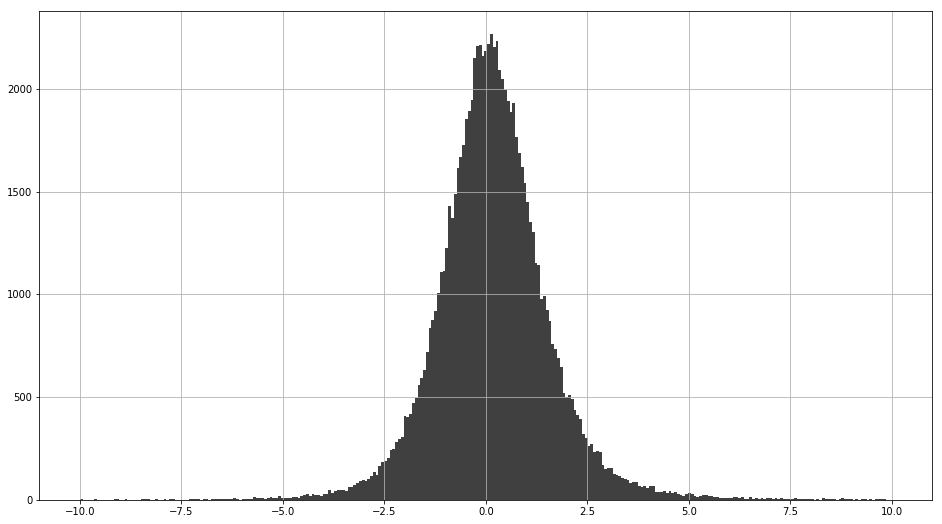

In [9]:
df_tgas_hip['parallax_difference'].hist(bins='fd',range=(-10,10), color='k', alpha=0.75,  figsize = (16,9)); #fd

Выделим таблицу "*рекордсменов*" в порядке убывания по разности параллаксов.

15:41:36.635552:: Begin plot_hex_hammer paralax ra, dec, 70.
15:41:37.068168:: End plot_hammer paralax.


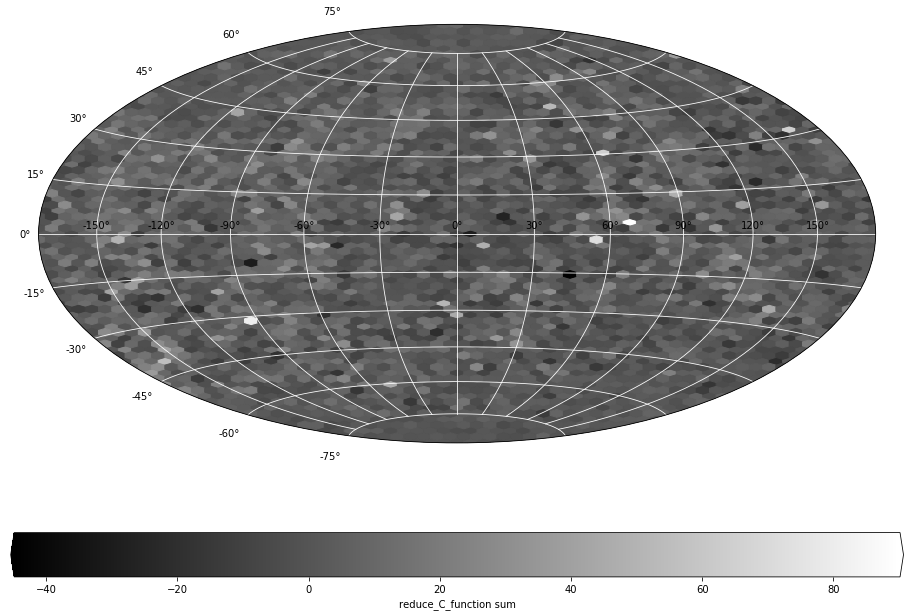

15:41:39.882592:: Begin plot_hex_hammer paralax l, b, 70.
15:41:40.208408:: End plot_hammer paralax.


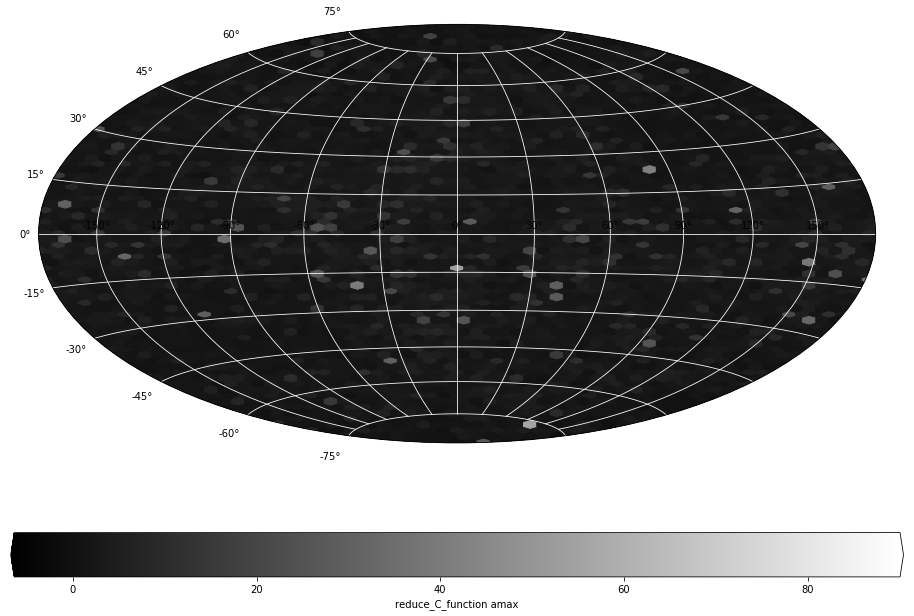

15:41:43.048704:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
15:41:43.504229:: End plot_hammer paralax.


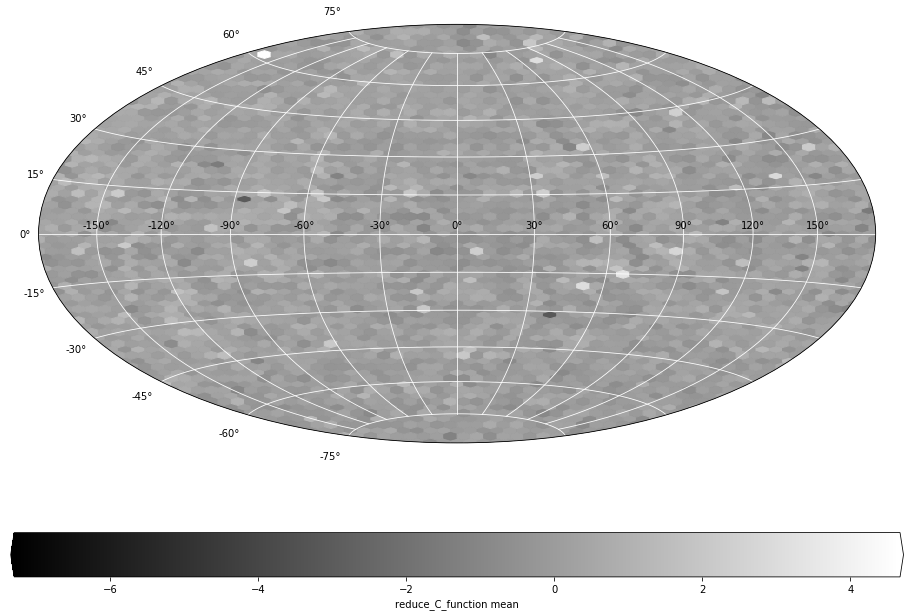

CPU times: user 9.94 s, sys: 1.91 s, total: 11.9 s
Wall time: 9.65 s


In [10]:
%%time

def hexbinmy(df0,x,y,c,gridsize=50,fun_red=np.average):
    import matplotlib as mpl
    plt.figure(figsize=(16,11))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('k')
    print('{}: Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.hexbin(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180,
        C = df0[c],
        gridsize=gridsize,
        cmap='gray',#'bwr',#'seismic', #'inferno',
        mincnt=0,
        reduce_C_function=fun_red,
        
        #bins='log',
        #marginals = True,
        #vmax=10,
        #s = 1.05,
        #marker='o',
        #color = 'r',
        #linewidths=0.01,
        #label = '20-40 ra'
    )
    

    cmap = mpl.cm.cool
    cb = plt.colorbar(h, ax=ax,cmap=cmap,               
                      #norm=norm,
                      #boundaries=bounds,
                      extend='both',
                      extendfrac='auto',
                      #ticks=bounds,
                      spacing='uniform',
                      orientation='horizontal',
                     )
    cb.set_label('reduce_C_function '+str(fun_red.__code__).split()[2])
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    #plt.tight_layout()
    #plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: End plot_hammer paralax.'.format(times()))
    plt.grid(color='w')#, linestyle='--', linewidth=1.9)
    plt.show()

hexbinmy(df_tgas_hip,'ra','dec','parallax_difference',70,np.sum)    
hexbinmy(df_tgas_hip,'l','b','parallax_difference',70,np.max)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference',70,np.mean)

In [11]:
tmp = df_tgas_hip[['l','b','parallax_difference']].sort_values(by='parallax_difference', ascending=False).head(50)
df_tgas_hip[['hip','parallax','parallax_hip','parallax_difference']].sort_values(
    by='parallax_difference', ascending=False).head(50)

,hip,parallax,parallax_hip,parallax_difference
20946,21000,3.613519,93.67,90.056481
42393,42525,5.939341,68.54,62.600659
116689,117081,7.767833,63.56,55.792167
91751,92059,1.025301,55.49,54.464699
16539,16582,3.352539,46.79,43.437461
49814,49971,10.032883,53.21,43.177117
90068,90368,9.239326,51.00,41.760674
87493,87784,0.901640,41.30,40.398360
11139,11167,1.600522,40.32,38.719478
17424,17468,3.696839,41.40,37.703161


In [90]:
df_tgas_hip[['hip','parallax','parallax_hip','parallax_difference']].sort_values(
    by='parallax_difference', ascending=True).head(50)

,hip,parallax,parallax_hip,parallax_difference
14066,14101,148.510255,106.16,-42.350255
91253,91557,56.483350,30.49,-25.993350
47496,47645,31.714570,6.92,-24.794570
58050,58241,28.225184,8.35,-19.875184
72238,72481,21.560865,3.86,-17.700865
104679,105041,18.720453,1.97,-16.750453
30473,30550,17.475213,1.62,-15.855213
1508,1512,18.674652,3.05,-15.624652
53781,53953,39.586811,24.22,-15.366811
5730,5743,25.107328,10.64,-14.467328


17:44:30.370625:: Begin plot_hex_hammer paralax l, b, 70.
17:44:30.375801:: End plot_hammer paralax.


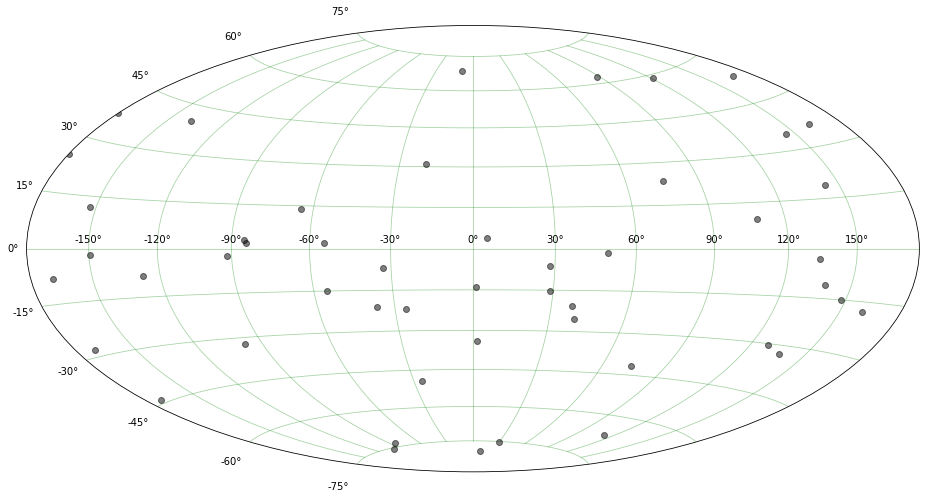

17:44:30.906145:: Begin plot_hex_hammer paralax l, b, 70.
17:44:30.909313:: End plot_hammer paralax.


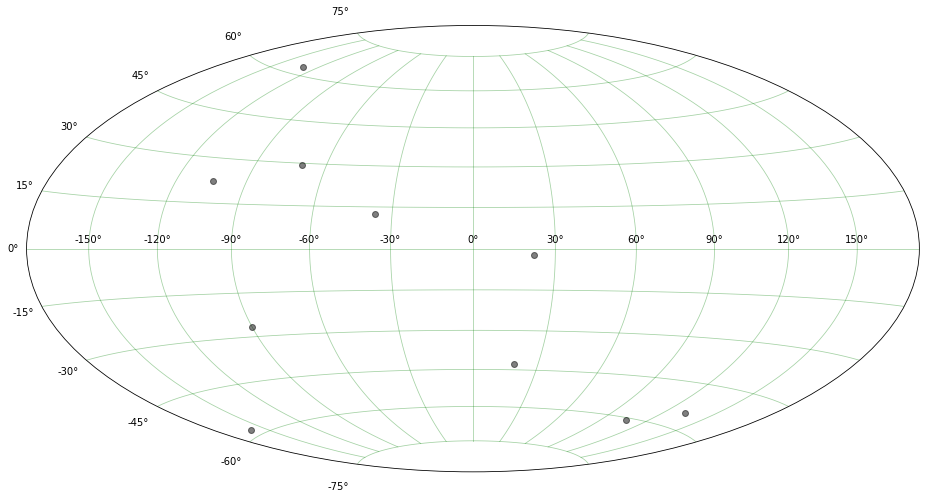

CPU times: user 1.14 s, sys: 640 ms, total: 1.78 s
Wall time: 992 ms


In [91]:
%%time

def scattermy(df0,x,y,c,gridsize=50,fun_red=np.average):
    import matplotlib as mpl
    plt.figure(figsize=(16,11))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('w')
    print('{}: Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.plot(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180, 'ko', alpha=.5
        #s = 1,
        #c = df0[c],
        #gridsize=gridsize,
        #cmap='seismic',#'gray',#'bwr',#'seismic', #'inferno',
        #mincnt=0,
        #reduce_C_function=fun_red,
        
        #bins='log',
        #marginals = True,
        #vmax=10,
        #s = 1.05,
        #marker="o",
        #color = 1/(df0.max - df0.min) *(df0[c] - df0.min),
        #linewidths=2.01,
        #label = '20-40 ra'
    )
    

    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    #plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: End plot_hammer paralax.'.format(times()))
    plt.grid(color='g',alpha = .35)#, linestyle='--', linewidth=1.9)
    plt.show()

#scattermy(tmp,'ra','dec','parallax_difference',70,np.sum)    
scattermy(tmp,'l','b','parallax_difference',70,np.max)
#scattermy(tmp,'ecl_lon', 'ecl_lat','parallax_difference',70,np.mean)
  
scattermy(df_tgas_hip[['l','b','parallax_difference']].sort_values(by='parallax_difference', ascending=True).head(10),'l','b','parallax_difference',70,np.max)

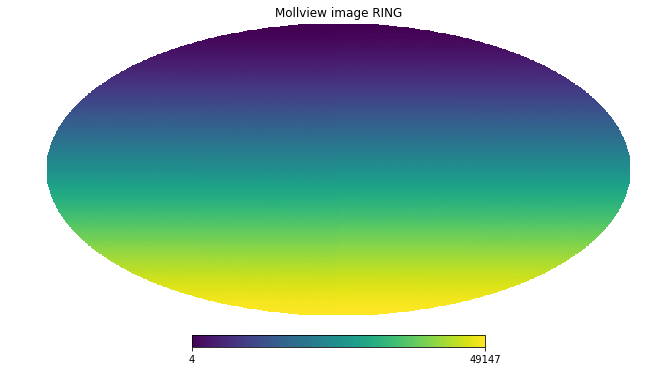

In [14]:
import numpy as np
import healpy as hp
NSIDE = 64
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image RING")

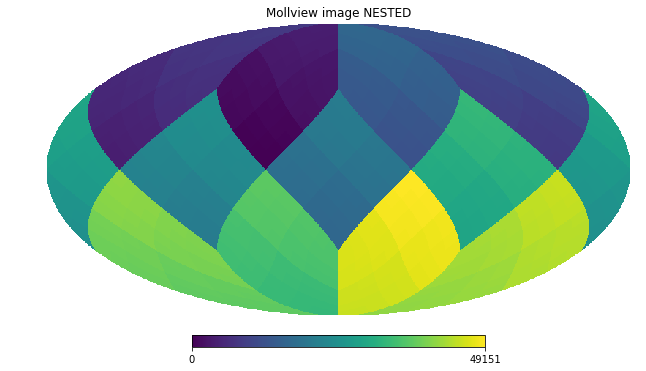

In [15]:
hp.mollview(m, nest=True, title="Mollview image NESTED")

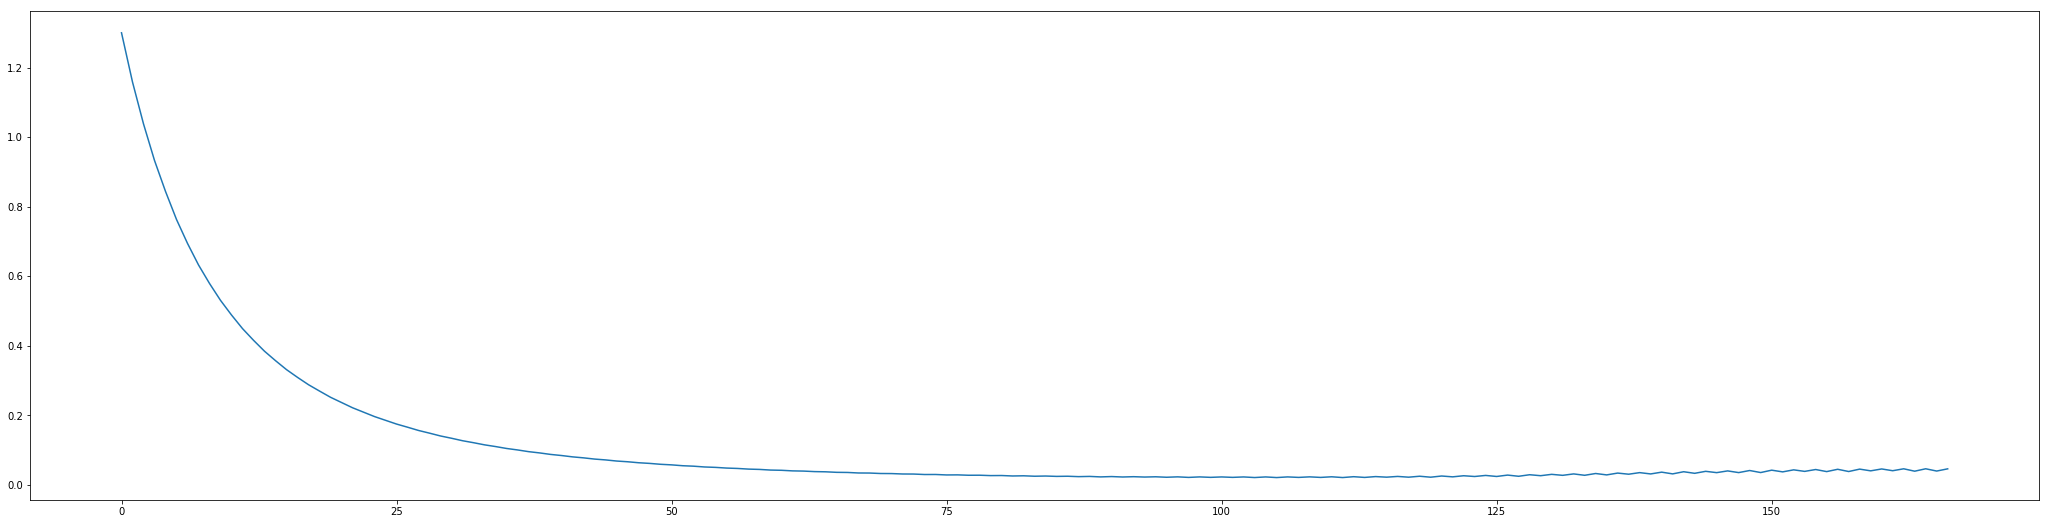

In [16]:
plt.figure(figsize=(36,9))
plt.plot([i for i in np.arange(len(hp.sphtfunc.anafast(m)[25:]))],hp.sphtfunc.anafast(m)[25:]);


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


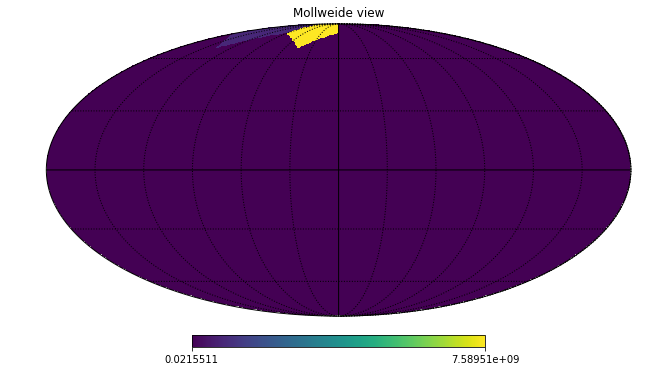

In [17]:
hp.mollview(hp.sphtfunc.anafast(m))
hp.graticule()

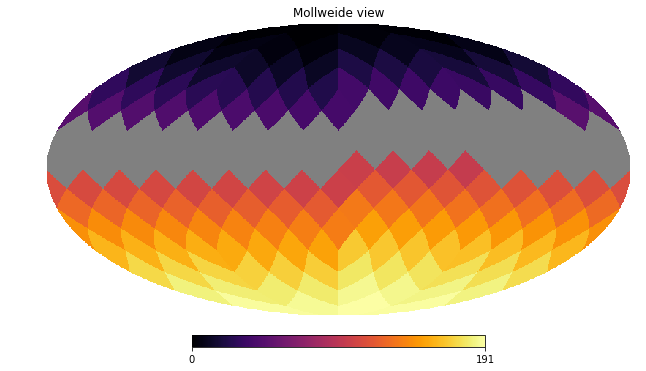

In [18]:
import healpy as hp
from pylab import cm

# Some map with masked pixels
npix = hp.nside2npix(4)
m = np.arange(npix, dtype=float)
m[50:100] = hp.UNSEEN

# adjusting the colour map
cmap = cm.inferno
cmap.set_under('w')
cmap.set_bad('grey')

hp.mollview(m, cmap=cmap)

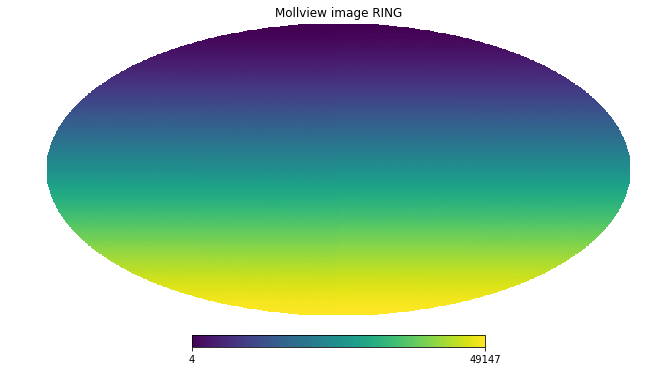

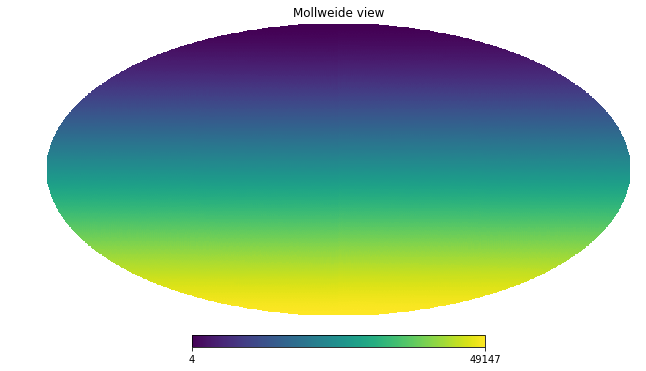

In [19]:
import numpy as np
import healpy as hp
NSIDE = 64
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image RING")
hp.visufunc.mollview(m)

In [20]:
vr = 6

masked_map = np.zeros(vr)
masked_map[(vr > 0)] = 1
influx = (0.3*rvir)**2*rho*vr

m = hp.ma(influx)
m.mask = masked_map

hp.mollview(hp.smoothing(m, sigma=0.1))
hp.graticule()

NameError: name 'rvir' is not defined

In [ ]:
str(np.sum.__code__).split()[2]